<a href="https://colab.research.google.com/github/Amoasi08/sns_analysis/blob/main/Exploring_SeabornExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 0: Imports and Reading Data**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_columns', 200)

In [ ]:
df = sns.load_dataset('exercise')

# Step 1: Data Understanding

* Dataframe *shape*
* *head* and *tail*
* *dtypes*
* *describe*
* *columns*

In [ ]:
# This show the number of rows and columns there.

df.shape

(90, 6)

In [ ]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [ ]:
#This show the data type of each column in the dataframe.

df.dtypes

,0
Unnamed: 0,int64
id,int64
diet,category
pulse,int64
time,category
kind,category


In [ ]:
df.describe()

,Unnamed: 0,id,pulse
count,90.000000,90.000000,90.000000
mean,44.500000,15.500000,99.700000
std,26.124701,8.703932,14.858471
min,0.000000,1.000000,80.000000
25%,22.250000,8.000000,90.250000
50%,44.500000,15.500000,96.000000
75%,66.750000,23.000000,103.000000
max,89.000000,30.000000,150.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

# Step 2: Data Preparation

* Dropping irrelevant columns and rows
* Identifing duplicated coloumns
* Renaming Creation
* Feature Creation

In [ ]:
df.sample(10)

,Unnamed: 0,id,diet,pulse,time,kind
55,55,19,no fat,98,15 min,walking
7,7,3,low fat,97,15 min,rest
84,84,29,no fat,94,1 min,running
60,60,21,low fat,93,1 min,running
28,28,10,no fat,97,15 min,rest
30,30,11,low fat,86,1 min,walking
65,65,22,low fat,112,30 min,running
59,59,20,no fat,103,30 min,walking
29,29,10,no fat,100,30 min,rest
41,41,14,low fat,100,30 min,walking


# For now due to the dataset I will not drop any column



In [ ]:
# Rename our columns
df.rename(columns={'Unnamed: 0': 'num'}, inplace=True)

In [ ]:
df.head()

,num,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [ ]:
# To check number of Null Values in the dataset.

df.isnull().sum()

,0
num,0
id,0
diet,0
pulse,0
time,0
kind,0


In [ ]:
# Check the Duplicate in the dataset

df.loc[df.duplicated()]

,num,id,diet,pulse,time,kind


In [ ]:
# Duplicate by subset
df.loc[df.duplicated(subset=['num'])]

,num,id,diet,pulse,time,kind


# Step 3: Feature Understanding

(Univariate analysis)
* Plotting Feature Distributions
* Histogram
* KDE
* Violin Plot

In [ ]:
df['pulse'].value_counts()

,count
pulse,
92,5
97,5
100,5
103,4
98,4
90,4
93,4
94,4
96,4


<Axes: xlabel='pulse', ylabel='Count'>

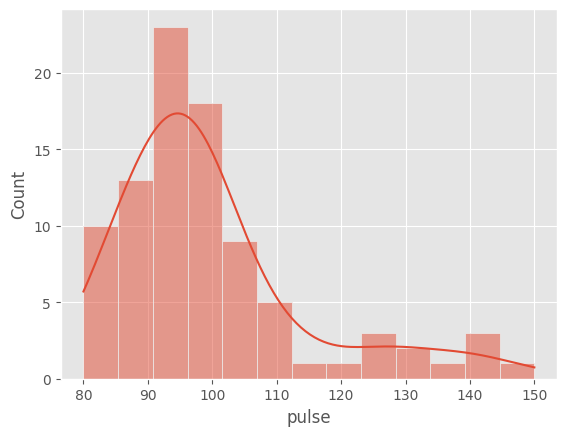

In [ ]:
sns.histplot(df['pulse'], kde=True)

<Axes: ylabel='pulse'>

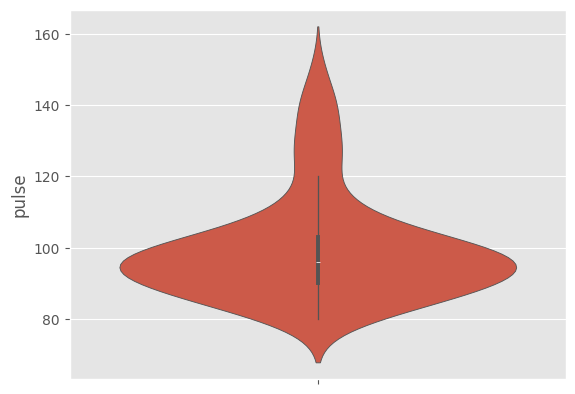

In [ ]:
sns.violinplot(df['pulse'])

(Bivariate Analysis)
* Swarm Plot
* Scatter Plot
* Line Plot
* Pair Plot

Text(0.5, 1.0, 'Diet vs Pulse due to kind of Exercise')

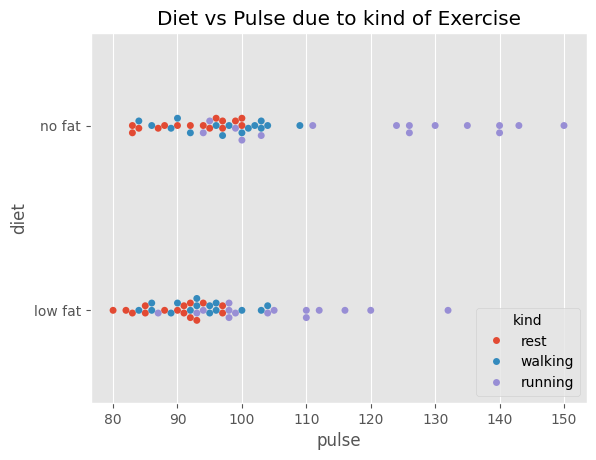

In [ ]:
ax = sns.swarmplot(x='pulse', y='diet', data=df, hue= 'kind')
ax.set_title('Diet vs Pulse due to kind of Exercise')

Text(0.5, 1.0, 'ID vs Pulse due to kind of Exercise')

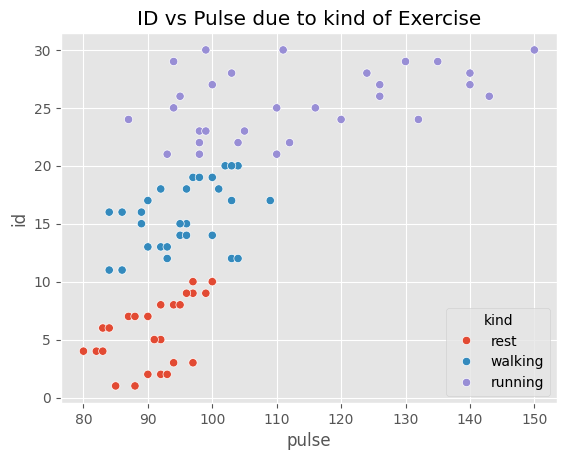

In [74]:
axs = sns.scatterplot(y='id', x='pulse', data=df, hue= 'kind')
axs.set_title('ID vs Pulse due to kind of Exercise')

Text(0.5, 1.0, 'Time vs Pulse due to kind of Exercise')

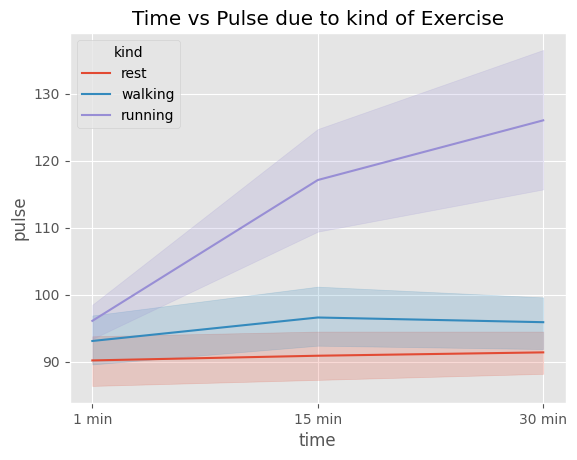

In [67]:
axl = sns.lineplot(x='time', y='pulse', data=df, hue= 'kind')
axl.set_title('Time vs Pulse due to kind of Exercise')

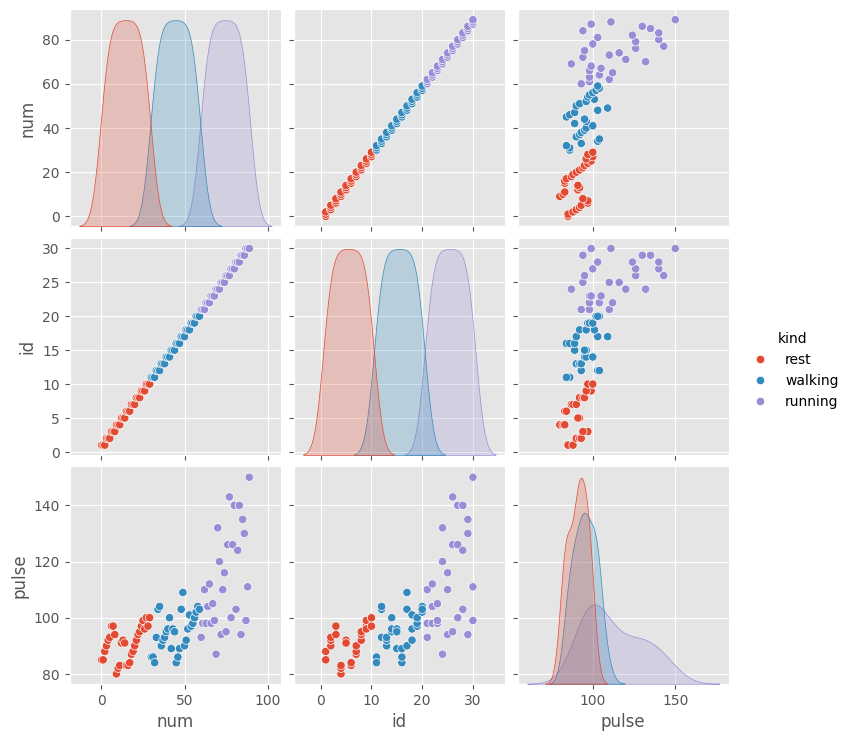

In [72]:
axp = sns.pairplot(df, hue='kind')